In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
### Reading the dataset Training.csv ###

data = pd.read_csv("Training.csv")

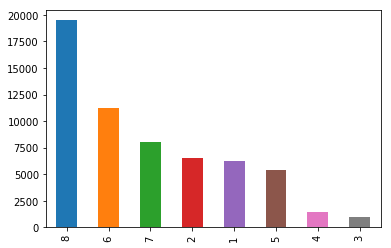

In [3]:
### Visualizing the skewness in the data ###

data['Response'].value_counts().plot('bar')

In [4]:
### Seeing the count of null values in the data in decending order ###

data.isnull().sum().sort_values(ascending=False)

Medical_History_10     58824
Medical_History_32     58274
Medical_History_24     55580
Medical_History_15     44596
Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
Employment_Info_6      10854
Medical_History_1       8889
Employment_Info_4       6779
Employment_Info_1         19
Medical_History_19         0
Medical_History_7          0
Medical_History_23         0
Medical_History_22         0
Medical_History_2          0
Medical_History_3          0
Medical_History_4          0
Medical_History_5          0
Medical_History_6          0
Medical_History_9          0
Medical_History_8          0
Medical_History_18         0
Medical_History_21         0
Family_Hist_1              0
Medical_History_12         0
Medical_History_13         0
Medical_History_14         0
                       ...  
Medical_Keyword_1          0
Medical_History_28         0
Medical_History_29         0
Medical_Histor

In [5]:
### List of columns to be dropped ###

columns = ["Id","Product_Info_2","Medical_History_10","Medical_History_32","Medical_History_24","Medical_History_15","Family_Hist_5","Family_Hist_3","Family_Hist_2","Insurance_History_5","Family_Hist_4"]

In [6]:
### Drop Columns ###

data.drop(columns, inplace=True, axis=1)

In [7]:
### Printing the Column_name along with dtypes and unique values ###

for i in data.columns:
    print(i + "  " + str(data[i].dtypes) + "  " + str(len(data[i].unique())))

Product_Info_1  int64  2
Product_Info_3  int64  34
Product_Info_4  float64  1491
Product_Info_5  int64  2
Product_Info_6  int64  2
Product_Info_7  int64  3
Ins_Age  float64  65
Ht  float64  39
Wt  float64  300
BMI  float64  3256
Employment_Info_1  float64  1937
Employment_Info_2  int64  36
Employment_Info_3  int64  2
Employment_Info_4  float64  872
Employment_Info_5  int64  2
Employment_Info_6  float64  993
InsuredInfo_1  int64  3
InsuredInfo_2  int64  2
InsuredInfo_3  int64  11
InsuredInfo_4  int64  2
InsuredInfo_5  int64  2
InsuredInfo_6  int64  2
InsuredInfo_7  int64  2
Insurance_History_1  int64  2
Insurance_History_2  int64  3
Insurance_History_3  int64  3
Insurance_History_4  int64  3
Insurance_History_7  int64  3
Insurance_History_8  int64  3
Insurance_History_9  int64  3
Family_Hist_1  int64  3
Medical_History_1  float64  172
Medical_History_2  int64  579
Medical_History_3  int64  3
Medical_History_4  int64  2
Medical_History_5  int64  3
Medical_History_6  int64  3
Medical_Hist

In [8]:
### Performs Normalization ###

def normalize_values(col, col_name):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(col)
    col_transformed = pd.DataFrame(x_scaled, columns=[col_name])
    return col_transformed

In [9]:
### Normalize the required columns ###

for i in data.columns:
    if data[i].dtypes == 'int64' or data[i].dtypes == 'float64' and i!='Response':
        
        try:
            col_split = i.split('_')[1]
            
            if col_split != 'Keyword':
                col_transformed = normalize_values(data[i].reshape(-1,1), i)
                data.drop(i, inplace=True, axis=1)
                data = pd.concat([data, col_transformed], axis=1)
            else:
                
                data[i] = data[i].astype('str')
        except Exception as e:
            
            pass
                

/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launch

/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launch

/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launch

/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launch

In [10]:
### List of columns with null values ###

column_name_with_null_values = ['Employment_Info_6','Medical_History_1','Employment_Info_4','Employment_Info_1']

In [11]:
column_with_null_values = data[column_name_with_null_values]

In [12]:
original_data = data

In [13]:
### Drop the columns with null values mentioned in the list above ###

data.drop(column_name_with_null_values, inplace=True, axis=1)

In [14]:
### DecisionTreeRegressor for imputation of the column with null values ###

def imputation(X_data_not_null, Y_data_not_null, X_data_null, col_name):
    regr = DecisionTreeRegressor()
    model = regr.fit(X_data_not_null, Y_data_not_null)
    predict = model.predict(X_data_null)
    X_data_null[col_name]= predict
    
    X_data_not_null[col_name] = Y_data_not_null
    dfs = [X_data_null,X_data_not_null]
    
    imputed_result = pd.concat([df.stack() for df in dfs],axis=0).unstack()
    
    return imputed_result[col_name]

In [15]:
### Separating out rows contaaining null value from Non-null value and then performing imputation ###

def null_split_for_imputation(X, Y, col_name):
    Y_data_null = Y[Y.isnull() == True]
    Y_data_not_null = Y[Y.isnull() == False]
    
    X_data_null = pd.merge(X, Y_data_null.to_frame(), left_index=True, right_index=True)
    
    X_data_null.drop(col_name,inplace=True, axis=1)
    X_data_not_null = pd.merge(X, Y_data_not_null.to_frame(), left_index=True, right_index=True)
    
    X_data_not_null.drop(col_name,inplace=True, axis=1)
    return imputation(X_data_not_null, Y_data_not_null.to_frame(), X_data_null,col_name)
    

In [16]:
### Iterating over columns with null values and performing imputation ###

for i in column_with_null_values.columns:
    full_col = null_split_for_imputation(data,column_with_null_values[i],i)
    data[i]= full_col
    print(i)
    

Employment_Info_6
Medical_History_1
Employment_Info_4
Employment_Info_1


In [17]:
### Normalize the required columns ###

for i in data.columns:
    if i!='Response':
        
        try:
            col_split = i.split('_')[1]
            
            if col_split != 'Keyword':
                col_transformed = normalize_values(data[i].reshape(-1,1), i)
                data.drop(i, inplace=True, axis=1)
                data = pd.concat([data, col_transformed], axis=1)
            else:
                
                data[i] = data[i].astype('str')
        except Exception as e:
            
            pass

/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/

/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/home/ankan/

In [18]:
original = data

In [19]:
y = original.Response

In [20]:
X = original.drop(columns='Response')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
### Shape of the Train Data before applying SMOTE ###

X_train.shape,X_test.shape

((47504, 116), (11877, 116))

In [23]:
### Instantiating Synthetic Minority Over sampling Technique (SMOTE) ###

smote = SMOTE(random_state=2)

In [24]:
### Applying SMOTE on normalized dataset ###

X_train_res_smote, y_train_res_smote = smote.fit_sample(X_train, y_train.ravel())

In [25]:
### Shape of the Train Data after applying SMOTE ###

X_train_res_smote.shape, y_train_res_smote.shape

((124456, 116), (124456,))

In [26]:
### Count of each Response category after applying SMOTE ###

from collections import Counter
list_y_train = y_train_res_smote.tolist()
Counter(list_y_train)

Counter({1: 15557,
         2: 15557,
         3: 15557,
         4: 15557,
         5: 15557,
         6: 15557,
         7: 15557,
         8: 15557})

In [27]:
### XgBoost classifier is trained with 300 estimators and max_depth 5  ###

xgb = XGBClassifier( learning_rate =0.1, n_estimators=300, max_depth=5,
                    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                    objective= 'multi:softprob', nthread=12, scale_pos_weight=1, seed=27)

xgb.fit(X_train_res_smote, y_train_res_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=12, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [65]:
### XgBoost classifier is trained with 1000 estimators and max_depth 3  ###

xgb1 = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=3,
                    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                    objective= 'multi:softprob', nthread=12, scale_pos_weight=1, seed=27)
xgb1.fit(X_train_res_smote, y_train_res_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=12, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [46]:
### RandomForest classifier is trained with 400 estimators  ###
rdm = RandomForestClassifier(n_estimators=400,oob_score=True)
rdm.fit(X_train_res_smote, y_train_res_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [74]:
### Using Random Forest to do important feature extraction ###

feature_importances = pd.DataFrame(rdm.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)                                

In [84]:
feature_to_removed = feature_importances[feature_importances.importance<0.01].index.tolist()

In [88]:
X_train_imp = X_train
X_test_imp = X_test

In [89]:
### Keeping only the important feature above 0.01 ###

X_train_imp.drop(columns=feature_to_removed)
X_test_imp.drop(columns=feature_to_removed)

,Ht,Wt,BMI,Product_Info_4,Ins_Age,Employment_Info_2,InsuredInfo_1,InsuredInfo_3,InsuredInfo_6,Insurance_History_4,...,Medical_History_2,Medical_History_4,Medical_History_9,Medical_History_23,Medical_History_29,Medical_History_41,Employment_Info_6,Medical_History_1,Employment_Info_4,Employment_Info_1
24148,0.690909,0.288703,0.484658,0.230769,0.388060,0.351351,0.5,0.7,0.0,0.5,...,0.267388,0.0,0.5,1.0,1.0,0.0,0.1400,0.233333,0.000000,0.075000
3881,0.672727,0.257322,0.447788,0.076923,0.597015,0.216216,0.0,0.5,1.0,0.0,...,0.171561,1.0,0.0,1.0,1.0,0.0,0.1000,0.025000,0.000000,0.064000
31778,0.745455,0.267782,0.394875,0.487179,0.507463,0.216216,0.0,0.7,0.0,0.0,...,0.698609,1.0,0.5,1.0,0.0,0.0,1.0000,0.000000,0.000000,0.300000
36442,0.727273,0.330544,0.516390,1.000000,0.313433,0.216216,0.0,0.2,0.0,0.0,...,0.023184,1.0,0.5,1.0,1.0,0.0,0.0000,0.029167,0.000000,0.200000
2349,0.727273,0.240586,0.366338,0.487179,0.164179,0.216216,0.0,0.7,1.0,0.0,...,0.350850,1.0,0.5,1.0,0.0,1.0,0.0000,0.070833,0.000000,0.060000
19974,0.690909,0.230126,0.381030,0.230769,0.522388,0.216216,0.0,0.7,0.0,0.0,...,0.003091,1.0,0.0,1.0,1.0,0.0,0.1750,0.054167,0.000000,0.080000
31110,0.709091,0.602510,1.000000,0.076923,0.014925,0.216216,0.0,0.7,1.0,1.0,...,0.564142,1.0,0.5,1.0,0.0,1.0,0.0000,0.025000,0.000000,0.025000
24048,0.745455,0.236402,0.344016,0.230769,0.477612,0.216216,0.5,0.9,0.0,0.5,...,0.425039,1.0,0.5,1.0,1.0,1.0,1.0000,0.012500,0.000000,0.100000
40667,0.781818,0.372385,0.523539,0.076923,0.656716,0.000000,0.0,0.5,0.0,0.0,...,0.333849,0.0,0.5,1.0,1.0,0.0,0.6500,0.029167,0.000000,0.050000
9034,0.600000,0.225941,0.466779,0.230769,0.283582,0.000000,0.5,0.7,1.0,1.0,...,0.238022,1.0,0.5,1.0,1.0,1.0,0.0000,0.004167,0.000000,0.015000


In [90]:
### Again applying SMOTE to maintain the balance in the training data ###

X_train_imp_res_smote, y_train_imp_res_smote = smote.fit_sample(X_train_imp, y_train.ravel())

In [91]:
### XgBoost classifier is trained with 200 estimators and max_depth 5 only taking the ###
### important features which we got by feature selection using Random Forest ###

xgb_2 = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=5,
                    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                    objective= 'multi:softprob', nthread=12, scale_pos_weight=1, seed=27)

xgb_2.fit(X_train_imp_res_smote, y_train_imp_res_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=12, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [104]:
### Evaluation Function for accuracy score ###

def evaluation(model, X_test,y_test):
    prediction = model.predict(np.array(X_test))
    pred = pd.DataFrame(data=prediction)
    print(accuracy_score(y_test, pred))

In [106]:
### Evaluation for xgb ###

evaluation(xgb, X_test,y_test)

0.5304369790351099


In [107]:
### Evaluation for xgb1 ###

evaluation(xgb1, X_test, y_test)

0.5301001936515956


In [110]:
### Evaluation for rdm ###

evaluation(rdm, X_test, y_test)

0.5212595773343437


In [109]:
### Evaluation for xgb_2 ###

evaluation(xgb_2, X_test_imp, y_test)

0.5265639471246948


In [51]:
from sklearn.svm import SVC

In [52]:
svc = SVC()

In [53]:
svc.fit(X_train_res_smote,y_train_res_smote)

/home/ankan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
### Evaluation for svc ###

evaluation(svc, X_test,y_test)

0.41946619516712974

In [111]:
### Saving the best model on the disk for future inferences ### 

with open('final_model.pickle', 'wb') as handle:
    pickle.dump(xgb, handle, protocol=pickle.HIGHEST_PROTOCOL)